<a href="https://colab.research.google.com/github/ssunsonic/ML_Project/blob/main/Image_Preprocessing_Modeling_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image Preprocessing and Initial CNN Rough Draft

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
from PIL import Image
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

Moved all test images into train folder since we can just split them into train and test anyway

In [ ]:
dataset = tf.keras.utils.image_dataset_from_directory('/content/drive/MyDrive/ECS171/ML_Project/images/')

Found 4320 files belonging to 2 classes.


In [ ]:
len(dataset)
#hello

135

In [ ]:
# dataset_name = dataset
class_names = dataset.class_names
print(class_names)

['chihuahua', 'muffin']


### Split into Train/Validation

In [ ]:
ds_train = tf.keras.preprocessing.image_dataset_from_directory('/content/drive/MyDrive/ECS171/ML_Project/images/',
            validation_split=0.2, subset = 'training', seed = 1)
ds_val = tf.keras.preprocessing.image_dataset_from_directory('/content/drive/MyDrive/ECS171/ML_Project/images/',
            validation_split=0.2, subset = 'validation', seed = 1)

Found 4320 files belonging to 2 classes.
Using 3456 files for training.
Found 4320 files belonging to 2 classes.
Using 864 files for validation.


## check the number of each class in the test/train


In [ ]:
label = []
for images, labels in ds_train:
  label.append(labels)


[<tf.Tensor: shape=(32,), dtype=int32, numpy=
array([0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 1], dtype=int32)>, <tf.Tensor: shape=(32,), dtype=int32, numpy=
array([1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1], dtype=int32)>, <tf.Tensor: shape=(32,), dtype=int32, numpy=
array([0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)>, <tf.Tensor: shape=(32,), dtype=int32, numpy=
array([1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0], dtype=int32)>, <tf.Tensor: shape=(32,), dtype=int32, numpy=
array([1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0], dtype=int32)>, <tf.Tensor: shape=(32,), dtype=int32, numpy=
array([1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 0

In [ ]:
print(len(label))

108


## Image Resizing

In [ ]:
# size of images we want to resize to
size = (50,50)

In [ ]:
# resize all images
ds_train = ds_train.map(lambda image, label: (tf.image.resize(image, size), label))
ds_val = ds_val.map(lambda image, label: (tf.image.resize(image, size), label))

In [ ]:
plt.figure(figsize=(10, 10))
for images, labels in ds_train.take(1):
  # display 9 resized images
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype('uint8'))
    plt.title(class_names[labels[i]])
    plt.axis("off")

KeyboardInterrupt: ignored

<Figure size 1000x1000 with 0 Axes>

## Greyscaling

In [ ]:
ds_train = ds_train.map(lambda image, label: (tf.image.rgb_to_grayscale(image), label))
ds_val = ds_val.map(lambda image, label: (tf.image.rgb_to_grayscale(image), label))

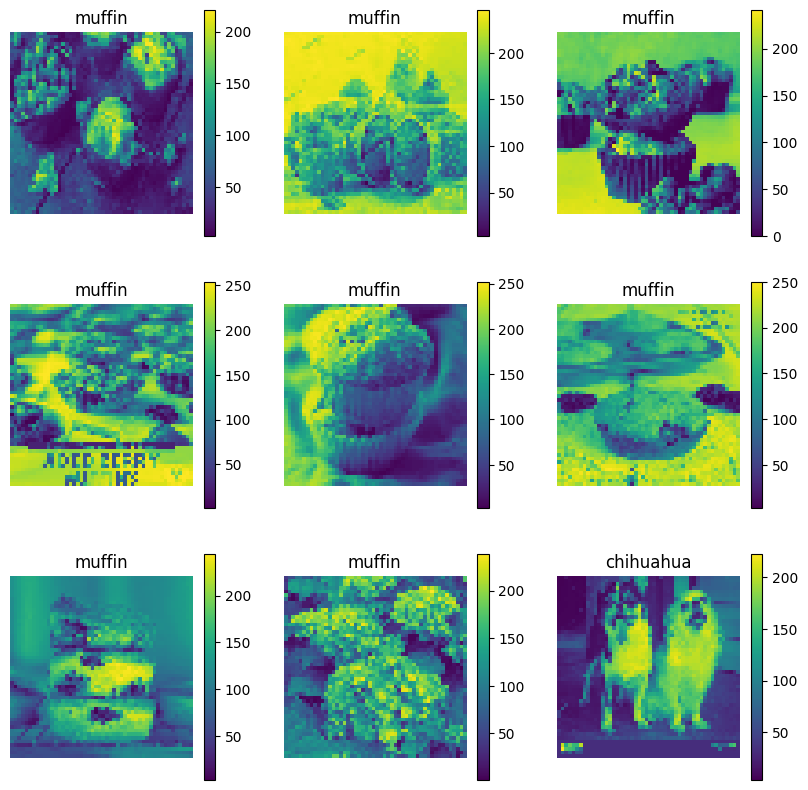

In [ ]:
plt.figure(figsize=(10, 10))
for images, labels in ds_train.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype('uint8'))
    plt.title(class_names[labels[i]])
    plt.axis("off")
    plt.colorbar()

## check the image sizes after preprocessing


In [ ]:
# Print image tensor shape
#print(ds_train.shape)
print(ds_train.take(1))
# Print image
plt.imshow(ds_train.take(1)[1].numpy().astype('uint8'))

<_TakeDataset element_spec=(TensorSpec(shape=(None, 50, 50, 1), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


TypeError: ignored

## Modeling

### CNN Keras Model


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

model = Sequential()
# grayscaled images only have one channel not 3 for typical RGB
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(50, 50, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
# softmax to output probability predictions
model.add(layers.Dense(1, activation = 'sigmoid'))

In [ ]:
from keras.losses import binary_crossentropy
# compile model
model.compile(optimizer = 'adam', loss = binary_crossentropy, metrics = ['accuracy'])

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 48, 48, 32)        320       
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 24, 24, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 22, 22, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 11, 11, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 9, 9, 64)          36928     
                                                                 
 flatten_4 (Flatten)         (None, 5184)             

In [ ]:
# Outputs of the 8 layers, which include conv2D and max pooling layers

from keras import models

layer_outputs = [layer.output for layer in model.layers[:8]]
print(layer_outputs)
activation_model = models.Model(inputs = model.input, outputs = layer_outputs)
activations = activation_model.predict(ds_train)


layer_names = []

for layer in model.layers[:8]:
  layer_names.append(layer.name)
print(layer_names)

[<KerasTensor: shape=(None, 48, 48, 32) dtype=float32 (created by layer 'conv2d_12')>, <KerasTensor: shape=(None, 24, 24, 32) dtype=float32 (created by layer 'max_pooling2d_8')>, <KerasTensor: shape=(None, 22, 22, 64) dtype=float32 (created by layer 'conv2d_13')>, <KerasTensor: shape=(None, 11, 11, 64) dtype=float32 (created by layer 'max_pooling2d_9')>, <KerasTensor: shape=(None, 9, 9, 64) dtype=float32 (created by layer 'conv2d_14')>, <KerasTensor: shape=(None, 5184) dtype=float32 (created by layer 'flatten_4')>, <KerasTensor: shape=(None, 64) dtype=float32 (created by layer 'dense_8')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_9')>]
108/108 [==============================] - 32s 255ms/step
['conv2d_12', 'max_pooling2d_8', 'conv2d_13', 'max_pooling2d_9', 'conv2d_14', 'flatten_4', 'dense_8', 'dense_9']


(3456, 48, 48, 32)


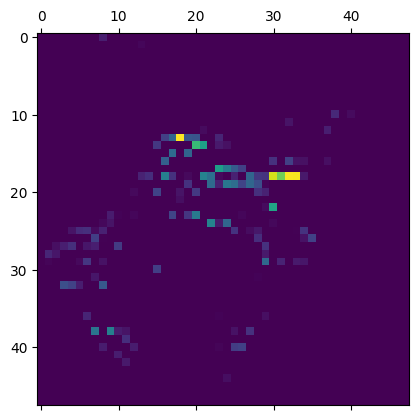

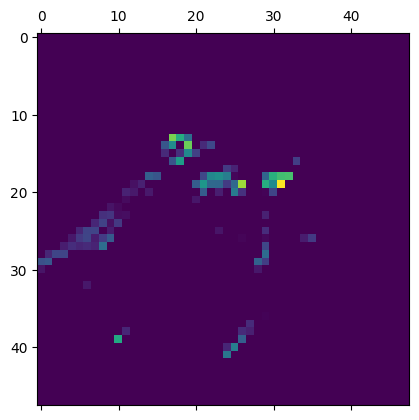

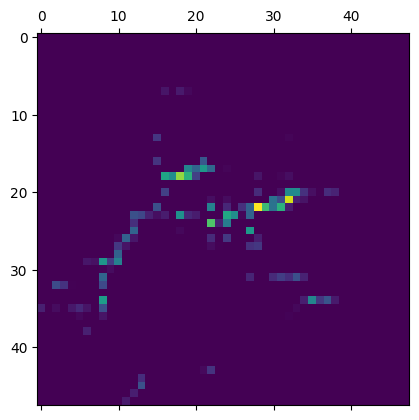

In [ ]:
# # Getting Activations of first layer
first_layer_activation = activations[0]

# # shape of first layer activation
print(first_layer_activation.shape)
plt.matshow(first_layer_activation[0, :, :, 0], cmap ='viridis')
# # 6th channel of the image after first layer of convolution is applied
plt.matshow(first_layer_activation[0, :, :, 1], cmap ='viridis')

# # 15th channel of the image after first layer of convolution is applied
plt.matshow(first_layer_activation[0, :, :, 15], cmap ='viridis')

In [ ]:
history = model.fit(ds_train, validation_data = ds_val, epochs = 10, batch_size = 10000)

Epoch 1/10
108/108 [==============================] - 307s 3s/step - loss: 1.6268 - accuracy: 0.7219 - val_loss: 0.4524 - val_accuracy: 0.7824
Epoch 2/10
108/108 [==============================] - 35s 316ms/step - loss: 0.4127 - accuracy: 0.8206 - val_loss: 0.3927 - val_accuracy: 0.8310
Epoch 3/10
108/108 [==============================] - 36s 326ms/step - loss: 0.3833 - accuracy: 0.8223 - val_loss: 0.5244 - val_accuracy: 0.7512
Epoch 4/10
108/108 [==============================] - 43s 385ms/step - loss: 0.3525 - accuracy: 0.8501 - val_loss: 0.3349 - val_accuracy: 0.8565


KeyboardInterrupt: ignored

In [ ]:
## Graphing Loss

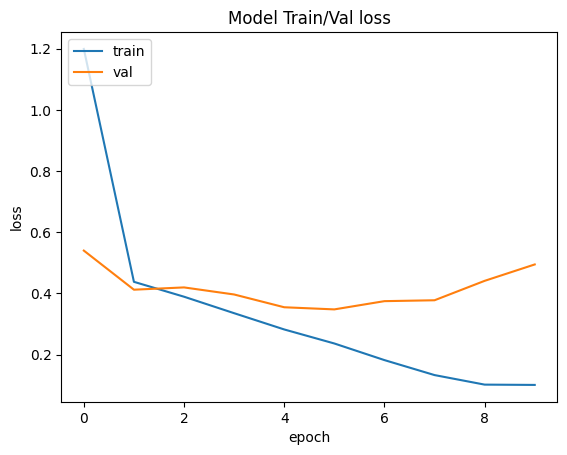

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Train/Val loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()